In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [7]:
import IPython
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
import pandas_datareader as pdr

In [10]:
from datetime import datetime

In [11]:
from __future__ import division

In [12]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [14]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [15]:
print end

2019-05-26 12:57:20.507000


In [16]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock,'yahoo',start,end) #globals take the string and make into global variables

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115
2018-06-01,190.259995,187.750000,187.990005,190.240005,23442500.0,187.387604


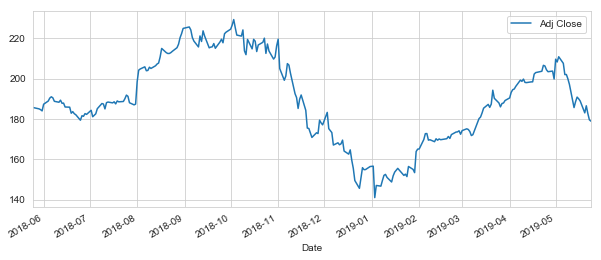

In [18]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

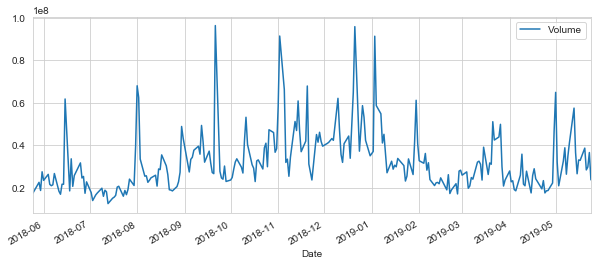

In [19]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [20]:
ma_day = [10,20,30]

for ma in ma_day:
    column_name = "Ma for %s days "%(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [21]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Ma for 10 days,Ma for 20 days,Ma for 30 days
Date,,,,,,,,,
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672,NaN,NaN,NaN
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675,NaN,NaN,NaN
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115,NaN,NaN,NaN
2018-06-01,190.259995,187.750000,187.990005,190.240005,23442500.0,187.387604,NaN,NaN,NaN


In [22]:
AAPL.columns

Index([           u'High',             u'Low',            u'Open',
                 u'Close',          u'Volume',       u'Adj Close',
       u'Ma for 10 days ', u'Ma for 20 days ', u'Ma for 30 days '],
      dtype='object')

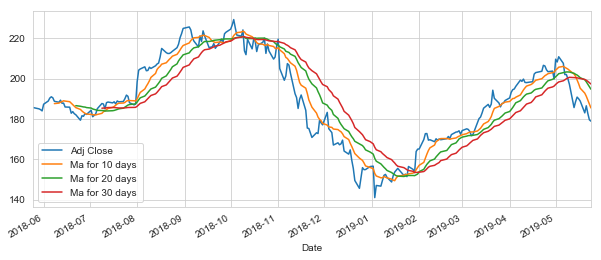

In [23]:
AAPL[['Adj Close', 'Ma for 10 days ','Ma for 20 days ','Ma for 30 days ']].plot(subplots=False, figsize=(10,4))

In [110]:
#Daily Returns for an Apple stocks

In [24]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

In [25]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Ma for 10 days,Ma for 20 days,Ma for 30 days,Daily Returns
Date,,,,,,,,,,
2018-05-25,189.649994,187.649994,188.229996,188.580002,17461000.0,185.752487,NaN,NaN,NaN,NaN
2018-05-29,188.750000,186.869995,187.600006,187.899994,22514100.0,185.082672,NaN,NaN,NaN,-0.003606
2018-05-30,188.000000,186.779999,187.720001,187.500000,18690500.0,184.688675,NaN,NaN,NaN,-0.002129
2018-05-31,188.229996,186.139999,187.220001,186.869995,27482800.0,184.068115,NaN,NaN,NaN,-0.003360
2018-06-01,190.259995,187.750000,187.990005,190.240005,23442500.0,187.387604,NaN,NaN,NaN,0.018034


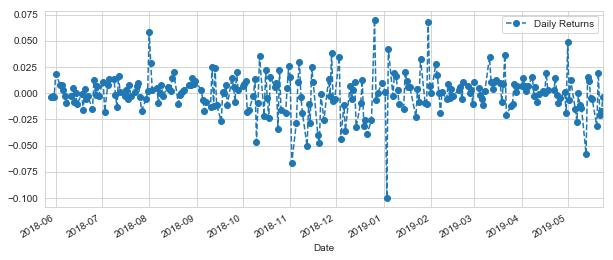

In [26]:
AAPL['Daily Returns'].plot(legend=True, figsize=(10,4),linestyle='--',marker='o')

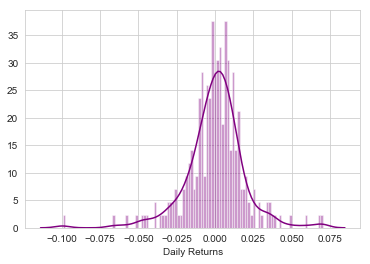

In [27]:
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color="purple")

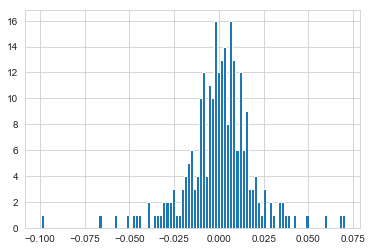

In [28]:
AAPL['Daily Returns'].hist(bins=100)

In [29]:
closing_DF = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [30]:
closing_DF.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-25,185.752487,1610.150024,1075.660034,96.788300
2018-05-29,185.082672,1612.869995,1060.319946,96.443893
2018-05-30,184.688675,1624.890015,1067.800049,97.368874
2018-05-31,184.068115,1629.619995,1084.989990,97.260628
2018-06-01,187.387604,1641.540039,1119.500000,99.179474


In [31]:
tech_returns = closing_DF.pct_change()

In [32]:
tech_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-05-25,NaN,NaN,NaN,NaN
2018-05-29,-0.003606,0.001689,-0.014261,-0.003558
2018-05-30,-0.002129,0.007453,0.007055,0.009591
2018-05-31,-0.003360,0.002911,0.016098,-0.001112
2018-06-01,0.018034,0.007315,0.031807,0.019729


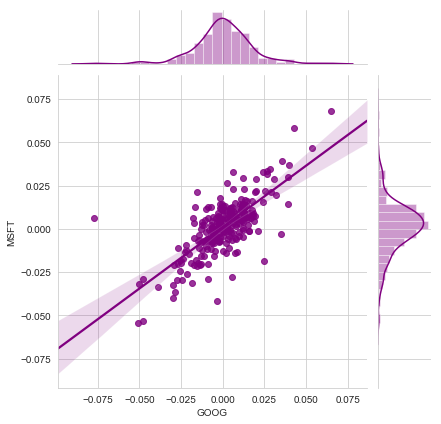

In [33]:
sns.jointplot('GOOG','MSFT',tech_returns, kind='reg', color='purple')

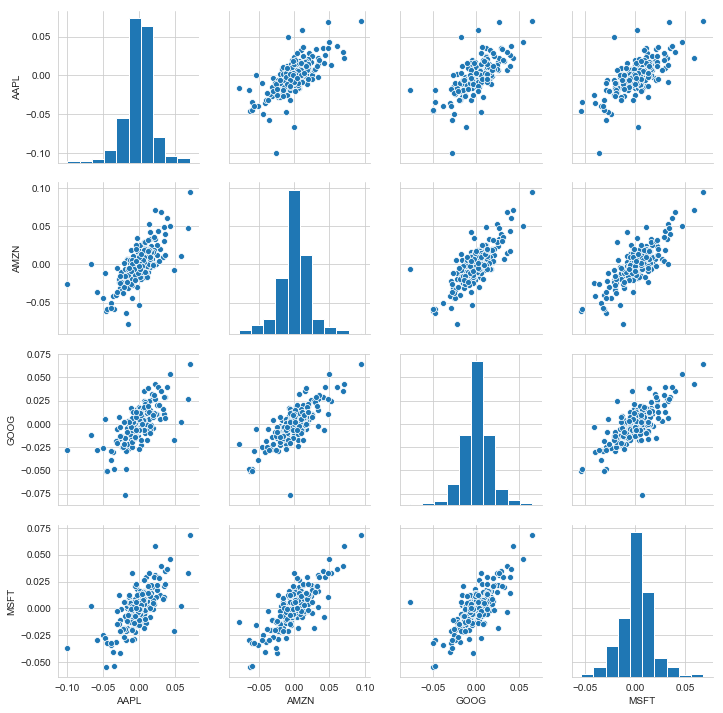

In [34]:
sns.pairplot(tech_returns.dropna())

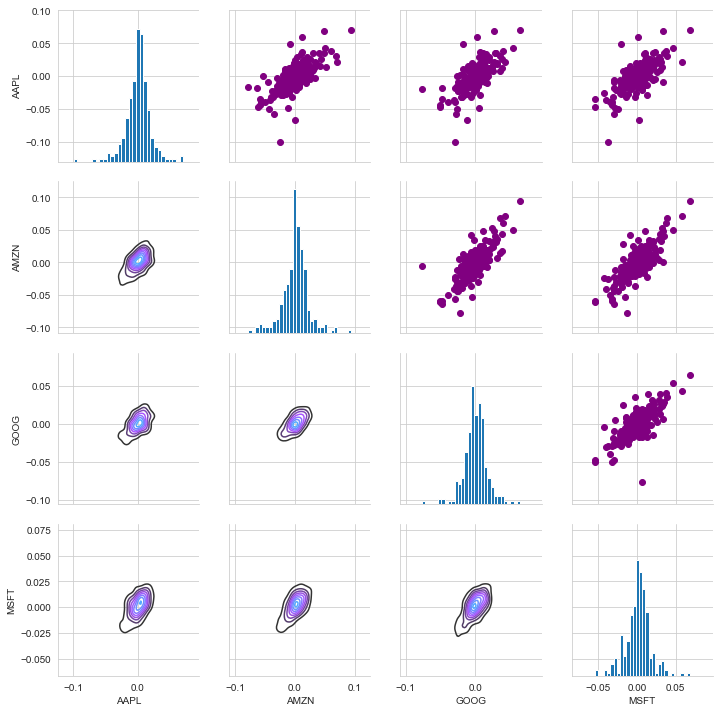

In [143]:
return_fig = sns.PairGrid(tech_returns.dropna())
return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

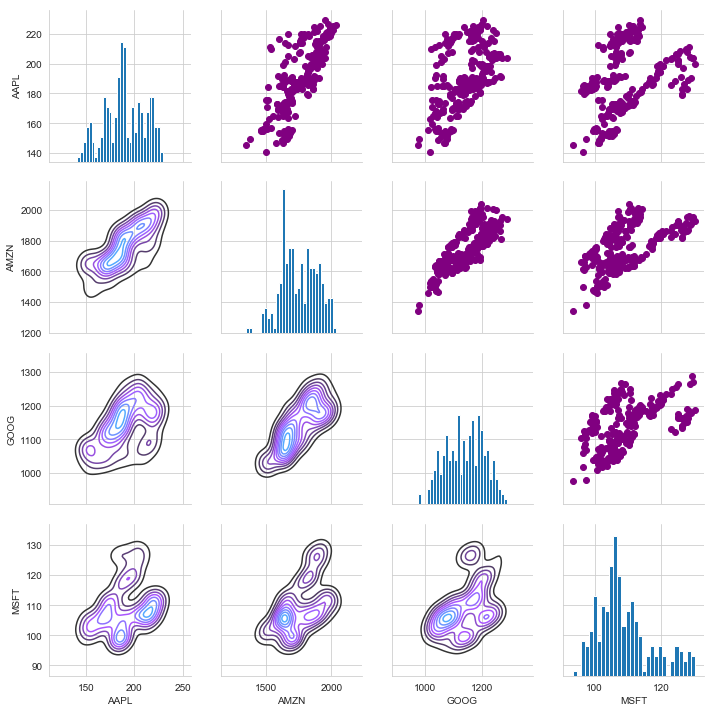

In [35]:
return_fig = sns.PairGrid(closing_DF.dropna())
return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

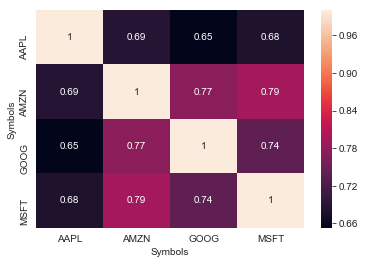

In [36]:
corr = tech_returns.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot= True)

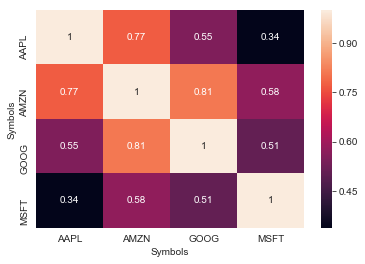

In [37]:
corr_closing = closing_DF.corr()
sns.heatmap(corr_closing, 
        xticklabels=corr_closing.columns,
        yticklabels=corr_closing.columns, annot= True)

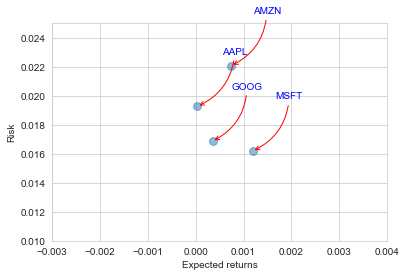

In [53]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3', color= 'red'), color = 'b')

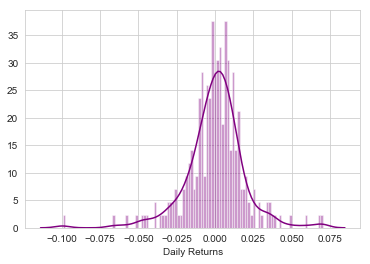

In [56]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='purple')


In [57]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [58]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

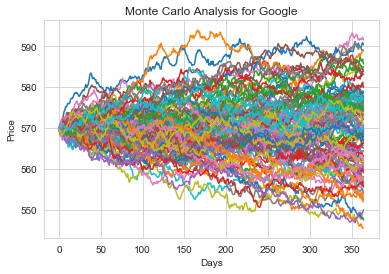

In [59]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [60]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

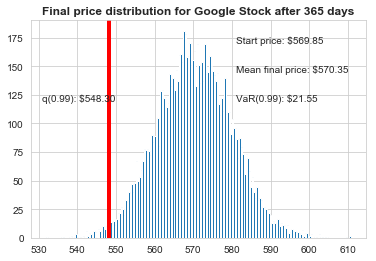

In [61]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');